# Gaussian Naive Bayes

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [23]:
data = pd.read_csv("seattle-weather.csv")
data.shape

(1461, 6)

In [24]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [25]:
data.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [26]:
features = ['precipitation', 'temp_max', 'temp_min']
x = data[features]
y = data.iloc[:, 5]

In [27]:
x.head(5)

,precipitation,temp_max,temp_min
0,0.0,12.8,5.0
1,10.9,10.6,2.8
2,0.8,11.7,7.2
3,20.3,12.2,5.6
4,1.3,8.9,2.8


In [28]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1022, 3), (1022,), (439, 3), (439,))

In [31]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)

GaussianNB()

In [32]:
y_preds = naiveBayes.predict(x_test)
y_preds

array(['rain', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'snow', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 's

In [33]:
print("Training Score (Accuracy): ", accuracy_score(y_train, naiveBayes.predict(x_train)))
print("Testing Score (Accuracy): ", accuracy_score(y_test, y_preds))

Training Score (Accuracy):  0.8414872798434442
Testing Score (Accuracy):  0.8451025056947609


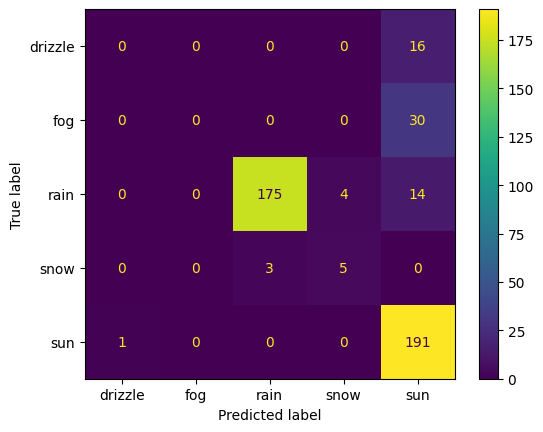

In [34]:
confusion = confusion_matrix(y_test, y_preds, labels=naiveBayes.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=naiveBayes.classes_)
display.plot()